# Landsat and Sentinel comparison

In [9]:
% pylab notebook
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

import sys
import os
sys.path.append(os.path.abspath('/g/data/r78/cek156/dea-notebooks/algorithms'))
import DEAPlotting

Populating the interactive namespace from numpy and matplotlib


/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Set up the extraction query

In [6]:
query = {'lat': (-29.97, -30.04),
         'lon': (146.86, 146.93),
         'output_crs': 'EPSG:3577',
         'resolution': (-10, 10),
         'time' :('2016-08-01', '2016-08-20')
        }

# First, access the Sentinel data

In [7]:
# Replace '156' and 'cek156' with the path to your own home directory on the VDI
s2aws = Datacube(config='/home/156/cek156/Sentinel2_datacube.conf')

Sentineldata = s2aws.load(product='s2a_ard_granule', group_by='solar_day', **query)

In [8]:
Sentineldata

<xarray.Dataset>
Dimensions:        (time: 1, x: 756, y: 858)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-14T00:21:53.535500
  * y              (y) float64 -3.342e+06 -3.342e+06 -3.342e+06 -3.342e+06 ...
  * x              (x) float64 1.414e+06 1.414e+06 1.414e+06 1.414e+06 ...
Data variables:
    pixel_quality  (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    contiguity     (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    aerosol        (time, y, x) int16 406 363 363 363 363 363 363 359 359 ...
    blue           (time, y, x) int16 447 536 421 348 356 410 413 390 403 ...
    green          (time, y, x) int16 892 1002 876 761 721 782 827 850 827 ...
    red            (time, y, x) int16 897 1015 776 580 541 638 706 735 710 ...
    rededge1       (time, y, x) int16 1622 1506 1506 1341 1341 1418 1418 ...
    rededge2       (time, y, x) int16 2942 3178 3178 3191 3191 2985 2985 ...
    rededge3       (time, y, x) int16 3017 3360 3360 3357 3

<IPython.core.display.Javascript object>


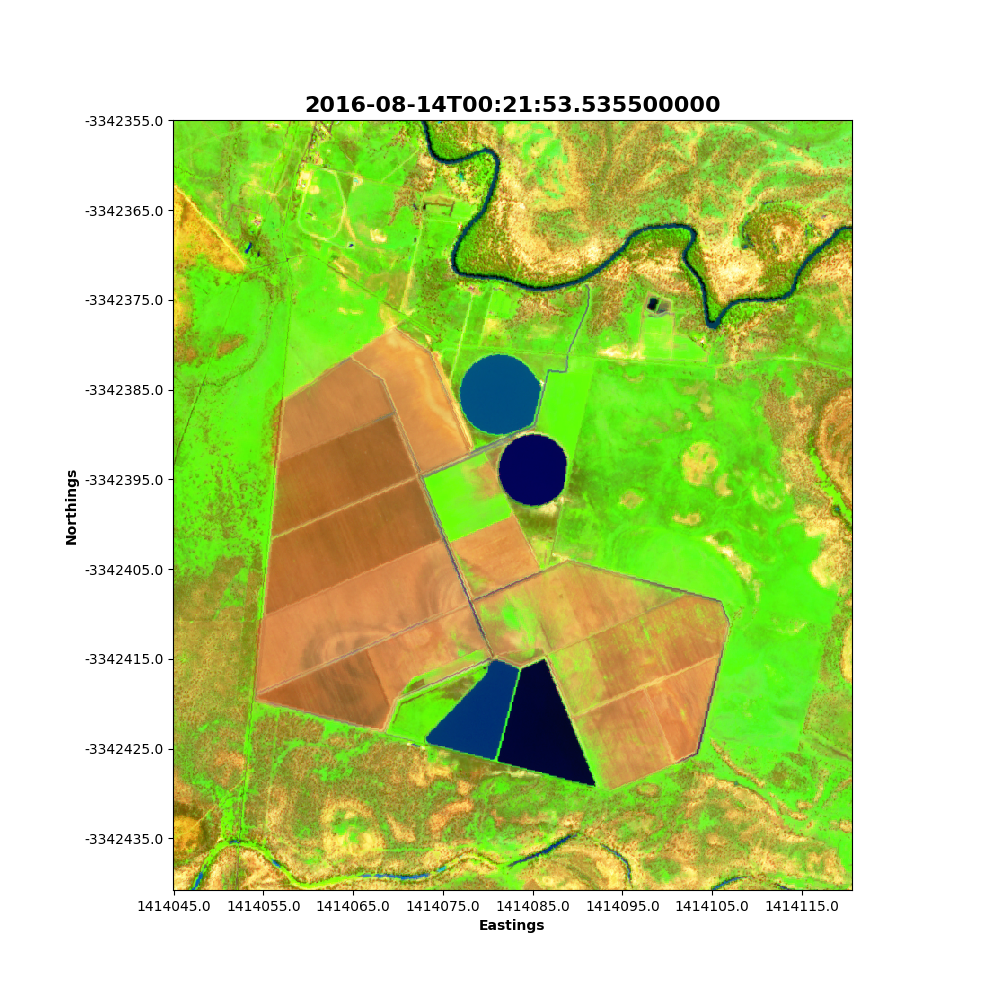

In [14]:
DEAPlotting.three_band_image(Sentineldata, bands = ['swir1', 'nir1', 'green'])

# Then access Landsat data

In [15]:
dc = Datacube(app = 'test')

Landsatdata = dc.load(product='ls8_nbar_albers', group_by='solar_day', **query)

In [16]:
Landsatdata

<xarray.Dataset>
Dimensions:          (time: 1, x: 756, y: 858)
Coordinates:
  * time             (time) datetime64[ns] 2016-08-06T00:07:40
  * y                (y) float64 -3.342e+06 -3.342e+06 -3.342e+06 -3.342e+06 ...
  * x                (x) float64 1.414e+06 1.414e+06 1.414e+06 1.414e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 312 312 280 280 304 304 304 326 326 ...
    blue             (time, y, x) int16 306 306 262 262 284 284 284 310 310 ...
    green            (time, y, x) int16 802 802 711 711 733 733 733 774 774 ...
    red              (time, y, x) int16 641 641 519 519 586 586 586 643 643 ...
    nir              (time, y, x) int16 3773 3773 3733 3733 3561 3561 3561 ...
    swir1            (time, y, x) int16 1598 1598 1439 1439 1458 1458 1458 ...
    swir2            (time, y, x) int16 875 875 726 726 773 773 773 809 809 ...
Attributes:
    crs:      EPSG:3577

<IPython.core.display.Javascript object>


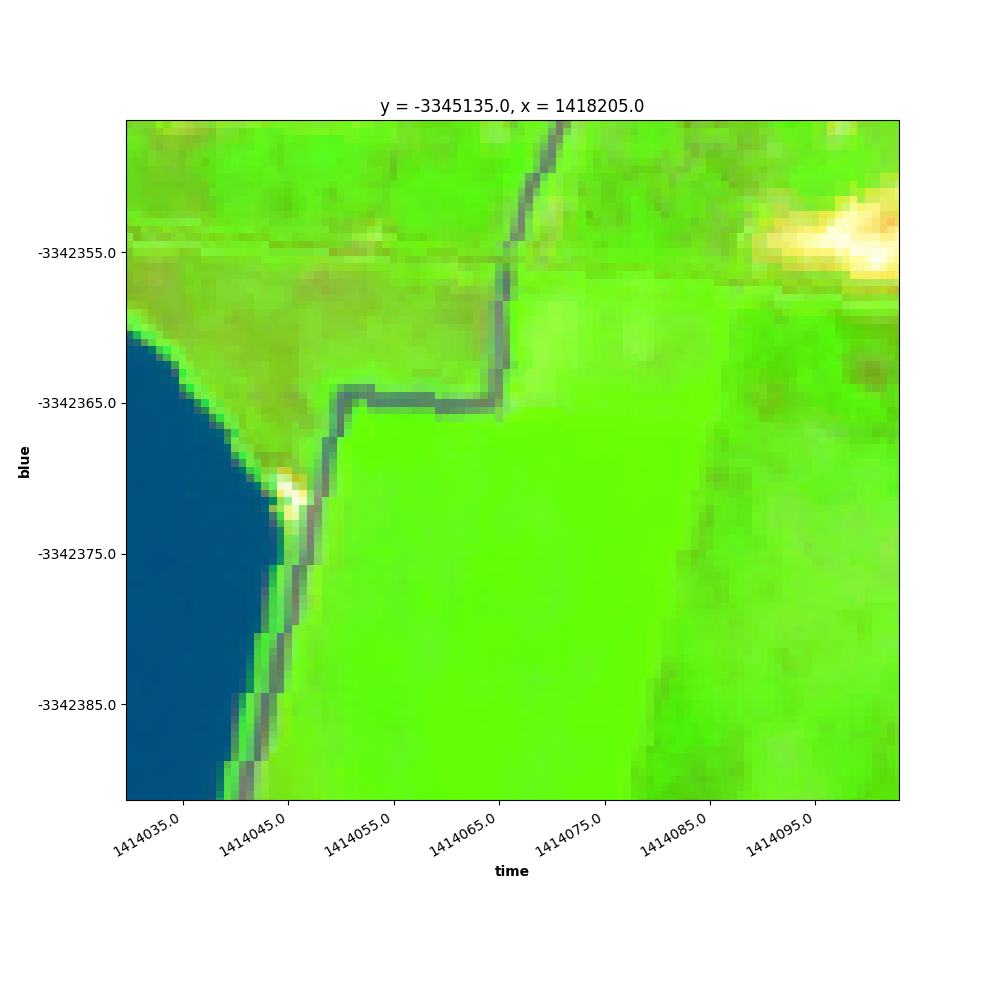

In [17]:
DEAPlotting.three_band_image(Sentineldata, bands = ['swir1', 'nir1', 'green'])

# Compare Landsat and Sentinel2

In [23]:
pixely = -3342375
pixelx = 1414065
Sentineldata.sel(y = pixely, x = pixelx, method = 'nearest')

<xarray.Dataset>
Dimensions:        (time: 1)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-14T00:21:53.535500
    y              float64 -3.342e+06
    x              float64 1.414e+06
Data variables:
    pixel_quality  (time) uint8 1
    contiguity     (time) uint8 1
    aerosol        (time) int16 391
    blue           (time) int16 336
    green          (time) int16 717
    red            (time) int16 540
    rededge1       (time) int16 1492
    rededge2       (time) int16 3113
    rededge3       (time) int16 3237
    nir1           (time) int16 3776
    nir2           (time) int16 3545
    swir1          (time) int16 1890
    swir2          (time) int16 1169
    t_contiguity   (time) uint8 1
    t_aerosol      (time) int16 389
    t_blue         (time) int16 329
    t_green        (time) int16 700
    t_red          (time) int16 527
    t_rededge1     (time) int16 1467
    t_rededge2     (time) int16 3062
    t_rededge3     (time) int16 3196
    t_nir1         (ti

In [35]:
query = {'lat': (-29.9913),
         'lon': (146.8972),
         'output_crs': 'EPSG:3577',
         'resolution': (-10, 10),
        }

Sentineldata = s2aws.load(product='s2a_ard_granule', group_by='solar_day', **query)

In [36]:
Sentineldata

<xarray.Dataset>
Dimensions:        (time: 40, x: 1, y: 1)
Coordinates:
  * time           (time) datetime64[ns] 2015-08-10T00:24:21.457000 ...
  * y              (y) float64 -3.345e+06
  * x              (x) float64 1.418e+06
Data variables:
    pixel_quality  (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    contiguity     (time, y, x) uint8 255 255 255 255 255 255 255 255 255 ...
    aerosol        (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    blue           (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    green          (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    red            (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    rededge1       (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    rededge2       (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    rededge3       (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 ...
    nir1           (time, y, x) int16 -999 -999 -999 -999 -9

<IPython.core.display.Javascript object>


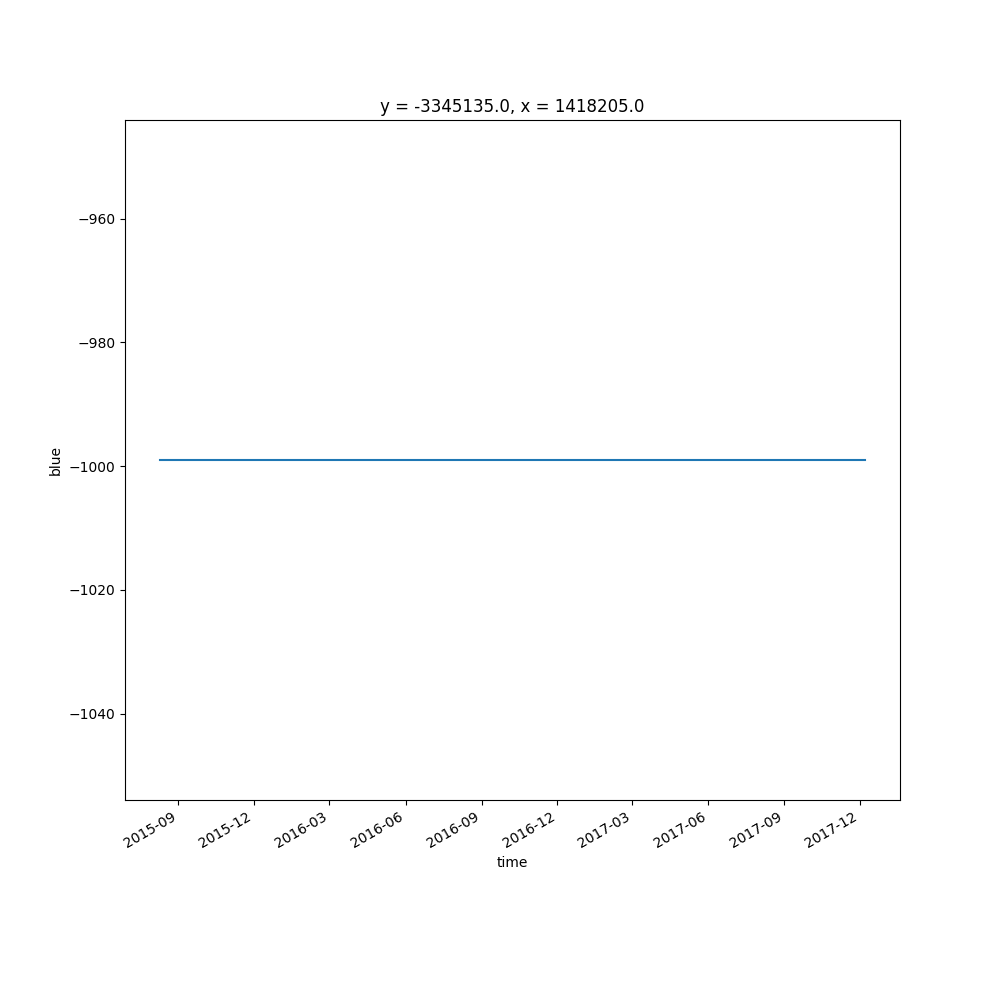

In [33]:
fig = plt.figure(figsize = [10, 10])
Sentineldata.blue.plot()